# Climate Data
### Kaggle project, visualization for international climate data

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


TempCountry = pd.read_csv("GlobalLandTemperaturesByCountry.csv") # reads csv to df
#TempCity = pd.read_csv("GlobalLandTemperaturesByCity.csv")


#print(TempCountry.columns)
display(TempCountry)
print('') 
#clearing rows with empty measurements
TempCountry['AverageTemperature'].replace('', np.nan, inplace=True)
TempCountry.dropna(subset=['AverageTemperature'], inplace=True)

display(TempCountry) # see the difference?
print('')
Countries = pd.unique(TempCountry['Country'])
n = Countries.size

#Removing rows that are either repeats or noncountries
#take a look at 'congo (democratic republic of the...)'' v. 'congo'
TempCountryNew = TempCountry[~TempCountry['Country'].isin( ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]
TempCountryNew = TempCountryNew.replace(['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

print('')


#print(index)
#print(n)


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
...,...,...,...,...
577456,2013-04-01,21.142,0.495,Zimbabwe
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe


In [84]:
# Averaging all records by country


rows = []
for country in Countries:
    MeanTemp = TempCountryNew[TempCountryNew['Country'] == country]['AverageTemperature'].mean()
    rows.append([country,MeanTemp])
    
    
OverallAverages = pd.DataFrame(rows, columns=["Country","MeanTemp"])
OverallAverages = OverallAverages.sort_values(by=["MeanTemp"], ascending=False)
OverallAverages = OverallAverages.dropna()

Ftemps = []

for x in OverallAverages['MeanTemp']:

    MeanTempF = x*(9/5) + 32
    Ftemps.append(MeanTempF)
    #print(MeanTempF)
    
OverallAverages['MeanTempF'] = Ftemps

## Who's the hottest?

,Country,MeanTemp,MeanTempF
60,Djibouti,28.816603,83.869885
135,Mali,28.441977,83.195558
34,Burkina Faso,28.083507,82.550312
192,Senegal,27.967375,82.341275
12,Aruba,27.920390,82.256702
...,...,...,...
144,Mongolia,-0.820671,30.522792
40,Canada,-5.216659,22.610014
180,Russia,-5.521882,22.060613
210,Svalbard And Jan Mayen,-7.448028,18.593550


Index(['Country', 'MeanTemp', 'MeanTempF'], dtype='object')


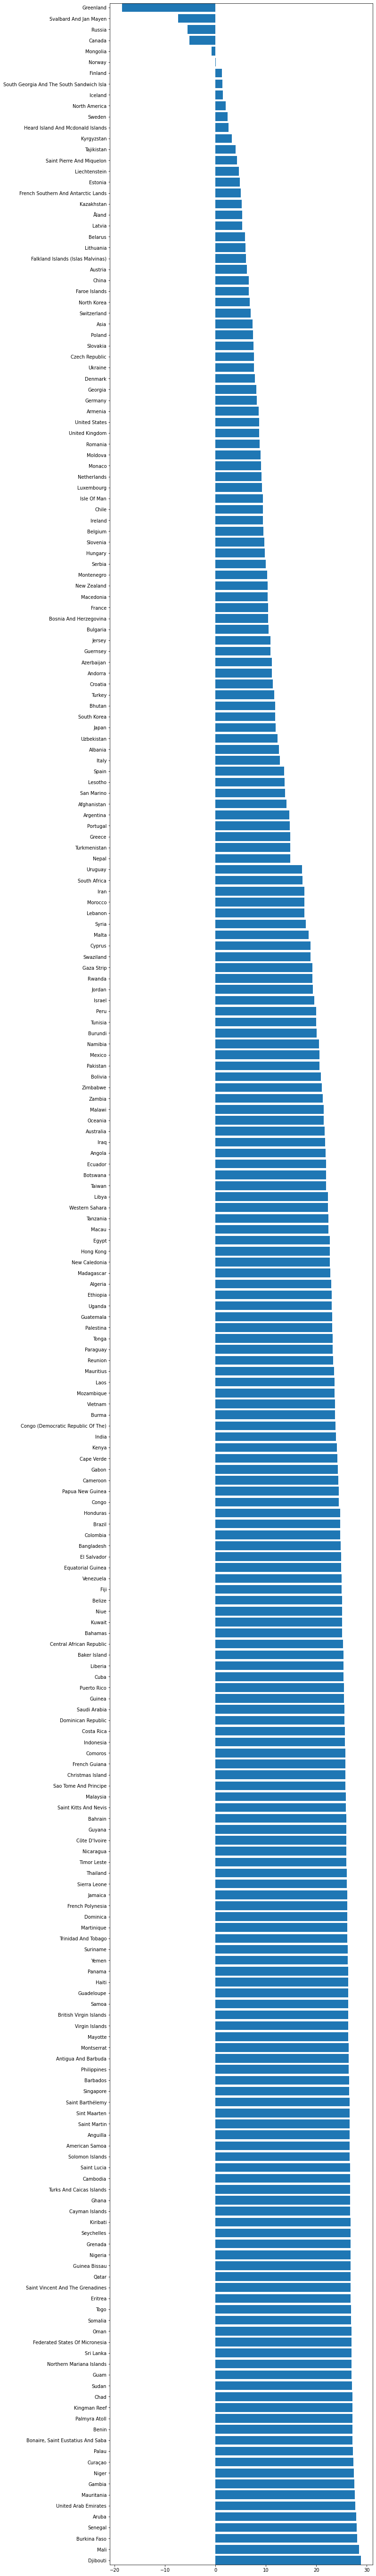

In [86]:
display(OverallAverages)
       
##figure = OverallAverages.plot(kind='barh', figsize=(10,200)) # need to mess with this
y_pos = np.arange(len(OverallAverages))
print(OverallAverages.columns)
plt.figure(figsize=(10,100))
plt.barh(OverallAverages['Country'],OverallAverages['MeanTemp']) 
plt.margins(y=0) # removes margins at top an bottom of plot

##plt.figure(figsize=(10,100))
##plt.barh(OverallAverages['Country'],OverallAverages['MeanTempF']) 
##plt.margins(y=0) # removes margins at top an bottom of plot

plt.show()


## What's the overall trend been?